# Sharp activation from multiple inputs at custom thresholds with LogisticMultiActivator

In [1]:
import dinkum
from dinkum.vfg import Gene
from dinkum.vfn import Tissue
from dinkum import vfg, vfn

from matplotlib import pyplot as plt

initializing: dinkum v0.6.1


Text(0, 0.5, 'output activation level')

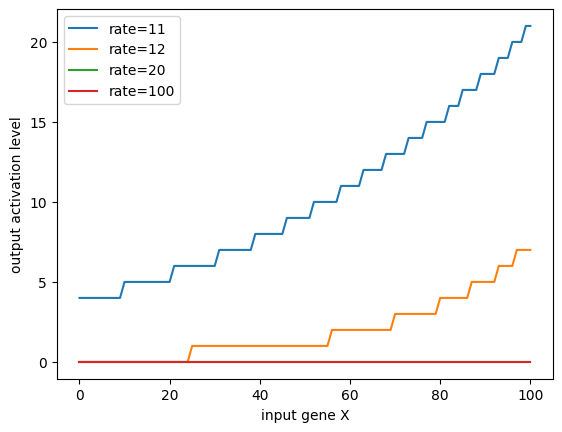

In [2]:
dinkum.reset()

m = Tissue(name='M')
x = Gene(name='X')
y = Gene(name='Y')
out = Gene(name='out')

logit = vfg.LogisticMultiActivator(activator_names=['X', 'Y'], weights=[0.2, 0.8])
out.custom_obj(logit)


for rate in (11, 12, 20, 100):
    logit.rate = rate
    xvals, yvals = vfg.calc_response_1d(target_gene_name='out',
                                        variable_gene_name='X',
                                        fixed_gene_states={ 'Y': vfg.GeneStateInfo(level=20, active=True) })

    plt.plot(xvals, yvals, label=f'rate={rate}')

plt.legend(loc='upper left')
plt.xlabel('input gene X')
plt.ylabel('output activation level')

initializing: dinkum v0.6.1


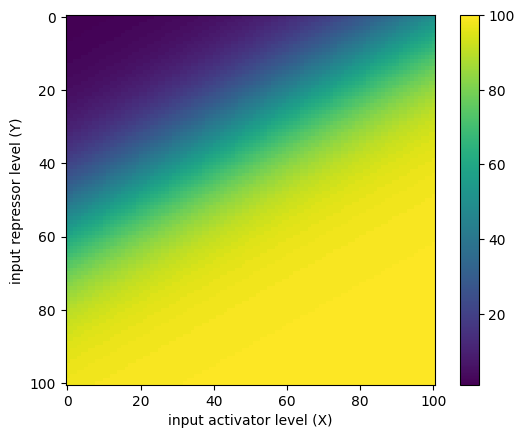

In [6]:
dinkum.reset()

m = Tissue(name='M')
x = Gene(name='X')
y = Gene(name='Y')
out = Gene(name='out')

logit = vfg.LogisticMultiActivator(activator_names=['X', 'Y'], weights=[0.5, 0.9])
out.custom_obj(logit)

arr = vfg.calc_response_2d(timepoint=2, target_gene_name='out', x_gene_name='X', y_gene_name='Y')

plt.imshow(arr, cmap='viridis', interpolation='nearest')
plt.xlabel('input activator level (X)')
plt.ylabel('input repressor level (Y)')
plt.colorbar()
plt.show()